In [1]:
import warnings
warnings.filterwarnings('ignore')
from sys import argv
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks',color_codes=True)
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
from scipy.stats import ttest_1samp,wilcoxon,shapiro,ttest_ind,mannwhitneyu,levene,bartlett
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chisquare,chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chisquare,chi2_contingency,f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.tsa.api as smt
from statsmodels.graphics.gofplots import ProbPlot
import pylab
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.stats import zscore
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering 

In [2]:
data=pd.read_csv('results-NT02.csv')
data.head()

,BATCH_ID,CALL_ORIG,CALL_ANS,CALL_DISCNT,CONV_SEC,CALLING_NUM,DIAL_NUM,CALLED_NUM,ORIG_OPER,TERM_OPER
0,20191009,2019-10-09T02:10:31,2019-10-09T02:10:41,2019-10-09T02:10:41,0,64085468,31842766,31842766,HTCL,WTT
1,20191009,2019-10-09T19:45:10,2019-10-09T19:45:16,2019-10-09T19:46:17,61,15238100,25681917,4326988473,HGC,WTT
2,20191009,2019-10-09T10:44:51,2019-10-09T10:44:52,2019-10-09T10:44:58,6,60865460,34205239,34205239,HTCL,WTT
3,20191009,2019-10-09T15:34:47,2019-10-09T15:35:07,2019-10-09T15:35:09,2,98747124,28285658,4324983358,HTCL,WTT
4,20191009,2019-10-09T15:52:16,2019-10-09T15:52:22,2019-10-09T15:54:24,122,51608760,34263701,34263701,HTCL,WTT


In [3]:
data.shape

(16000, 10)

In [4]:
data.describe()

,BATCH_ID,CONV_SEC,CALLING_NUM
count,1.600000e+04,16000.000000,1.600000e+04
mean,2.019103e+07,90.449938,6.704055e+08
std,3.555986e+00,236.666449,6.812899e+10
min,2.019101e+07,0.000000,1.523810e+07
25%,2.019102e+07,4.000000,6.253648e+07
50%,2.019103e+07,27.000000,9.114856e+07
75%,2.019103e+07,79.000000,9.487317e+07
max,2.019103e+07,5585.000000,8.613631e+12


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 10 columns):
BATCH_ID       16000 non-null int64
CALL_ORIG      16000 non-null object
CALL_ANS       16000 non-null object
CALL_DISCNT    16000 non-null object
CONV_SEC       16000 non-null int64
CALLING_NUM    16000 non-null int64
DIAL_NUM       16000 non-null object
CALLED_NUM     16000 non-null object
ORIG_OPER      16000 non-null object
TERM_OPER      16000 non-null object
dtypes: int64(3), object(7)
memory usage: 1.2+ MB


In [6]:
data.columns

Index(['BATCH_ID', 'CALL_ORIG', 'CALL_ANS', 'CALL_DISCNT', 'CONV_SEC',
       'CALLING_NUM', 'DIAL_NUM', 'CALLED_NUM', 'ORIG_OPER', 'TERM_OPER'],
      dtype='object')

In [7]:
data.ORIG_OPER.value_counts()

HTCL    15415
HGC       577
SMT         4
PEOP        2
NFND        1
SUN         1
Name: ORIG_OPER, dtype: int64

From the above count originating company there are 5 different originating company to this switch HTCT,HGC,SMT,PCCW,StSL

HTCl is the highest opereating company where as PCCW and STSL is the lowest.  

In [8]:
data.BATCH_ID.value_counts()

20191025    4754
20191026    3865
20191028    3863
20191027    2893
20191009     625
Name: BATCH_ID, dtype: int64

In [9]:
data.TERM_OPER.value_counts()

PCCW    15375
WTT       625
Name: TERM_OPER, dtype: int64

In [10]:
#Converting the date columns to date time
data['CALL_ORIG'] = pd.to_datetime(data['CALL_ORIG'], format = '%Y-%m-%d %H:%M:%S')
data['CALL_ANS'] = pd.to_datetime(data['CALL_ANS'], format = '%Y-%m-%d %H:%M:%S')
data['CALL_DISCNT'] = pd.to_datetime(data['CALL_DISCNT'], format = '%Y-%m-%d %H:%M:%S')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 10 columns):
BATCH_ID       16000 non-null int64
CALL_ORIG      16000 non-null datetime64[ns]
CALL_ANS       16000 non-null datetime64[ns]
CALL_DISCNT    16000 non-null datetime64[ns]
CONV_SEC       16000 non-null int64
CALLING_NUM    16000 non-null int64
DIAL_NUM       16000 non-null object
CALLED_NUM     16000 non-null object
ORIG_OPER      16000 non-null object
TERM_OPER      16000 non-null object
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 1.2+ MB


In [12]:
def hr_func(ts):
    return ts.hour

data['hour'] = data['CALL_ORIG'].apply(hr_func)

In [13]:
data.head()

,BATCH_ID,CALL_ORIG,CALL_ANS,CALL_DISCNT,CONV_SEC,CALLING_NUM,DIAL_NUM,CALLED_NUM,ORIG_OPER,TERM_OPER,hour
0,20191009,2019-10-09 02:10:31,2019-10-09 02:10:41,2019-10-09 02:10:41,0,64085468,31842766,31842766,HTCL,WTT,2
1,20191009,2019-10-09 19:45:10,2019-10-09 19:45:16,2019-10-09 19:46:17,61,15238100,25681917,4326988473,HGC,WTT,19
2,20191009,2019-10-09 10:44:51,2019-10-09 10:44:52,2019-10-09 10:44:58,6,60865460,34205239,34205239,HTCL,WTT,10
3,20191009,2019-10-09 15:34:47,2019-10-09 15:35:07,2019-10-09 15:35:09,2,98747124,28285658,4324983358,HTCL,WTT,15
4,20191009,2019-10-09 15:52:16,2019-10-09 15:52:22,2019-10-09 15:54:24,122,51608760,34263701,34263701,HTCL,WTT,15


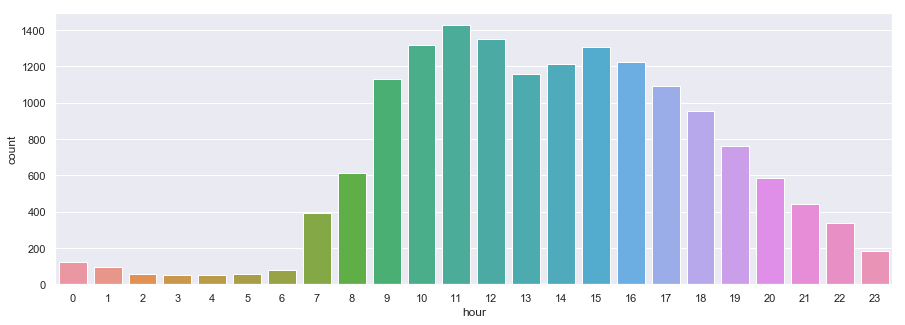

In [14]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(x="hour", data=data)
plt.show()

From the about count plot high traffic in 11th hour and lowest at 2,3 and 4 hours respectly  

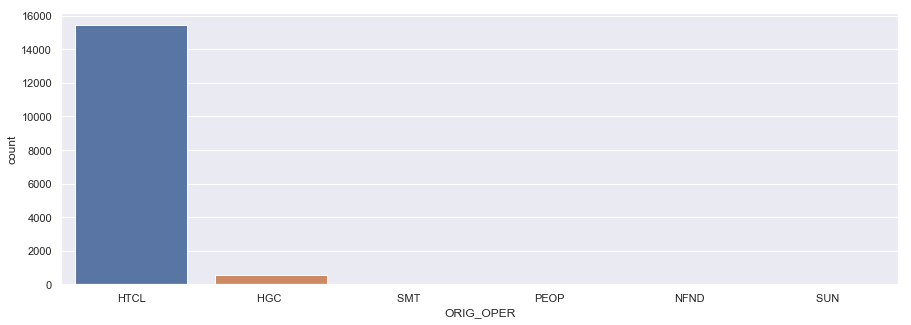

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(x="ORIG_OPER", data=data)
plt.show()

From the above plot originating company there are 5 different originating company to this switch HTCT,HGC,SMT,PCCW,StSL

HTCl is the highest opereating company where as PCCW and STSL is the lowest.  

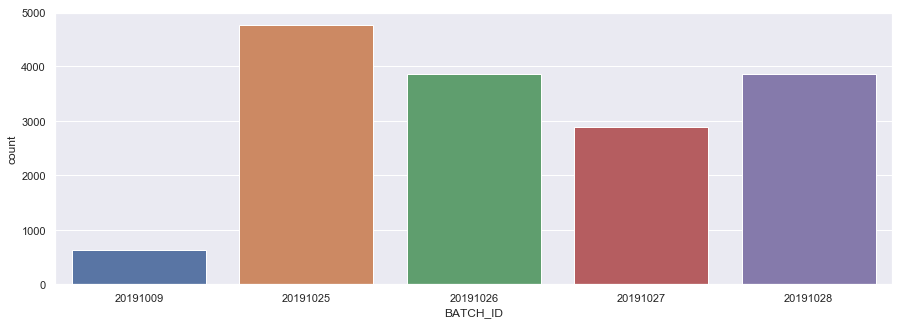

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.countplot(x="BATCH_ID", data=data)
plt.show()

From the above plot the are highest calls in the batch 20191016 and less in the 20191015 

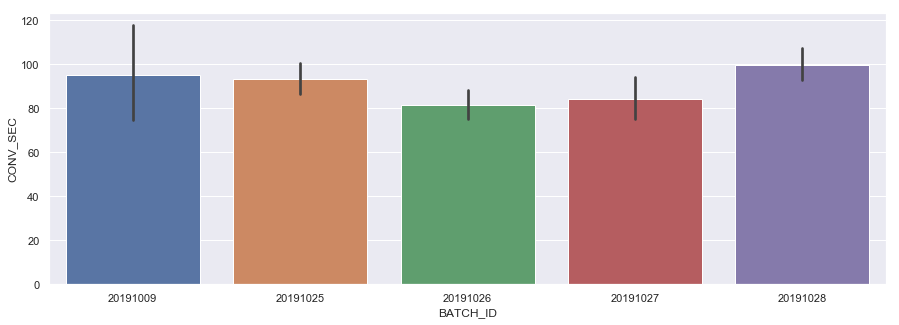

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="CONV_SEC", x="BATCH_ID", data=data)
plt.show()

From the above plot 20191028 recorded and lowest in the 20191026

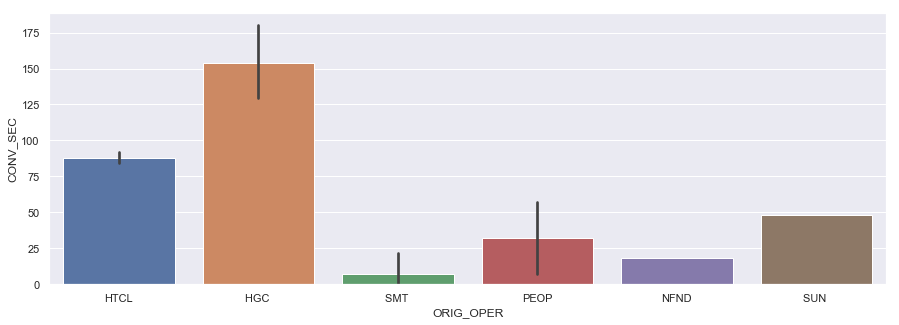

In [18]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="CONV_SEC", x="ORIG_OPER", data=data)
plt.show()

From the above plot the more conversation through the HGC originating company and lowerst from SMT originating company

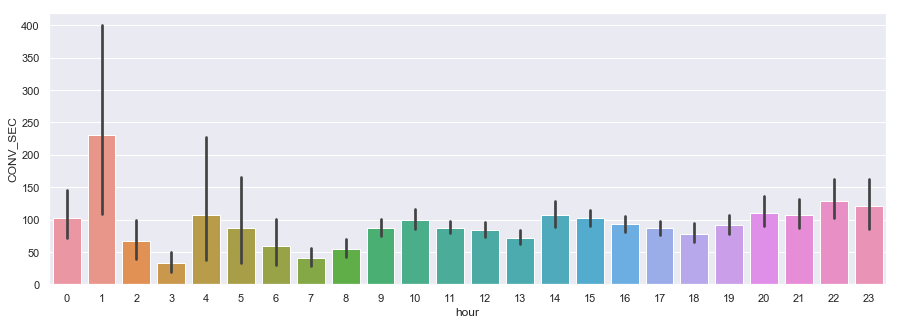

In [19]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="CONV_SEC", x="hour", data=data)
plt.show()

From the above plot we can observe at hour 1 more conversation happed and at hour 7 lowest.

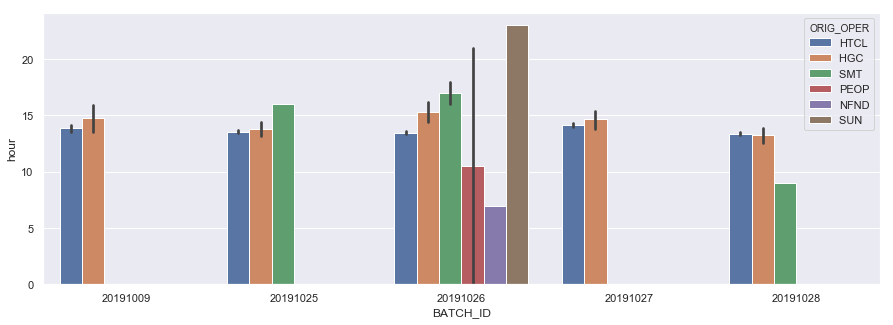

In [20]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,5))
sns.barplot(y="hour", x="BATCH_ID",hue="ORIG_OPER", data=data)
plt.show()

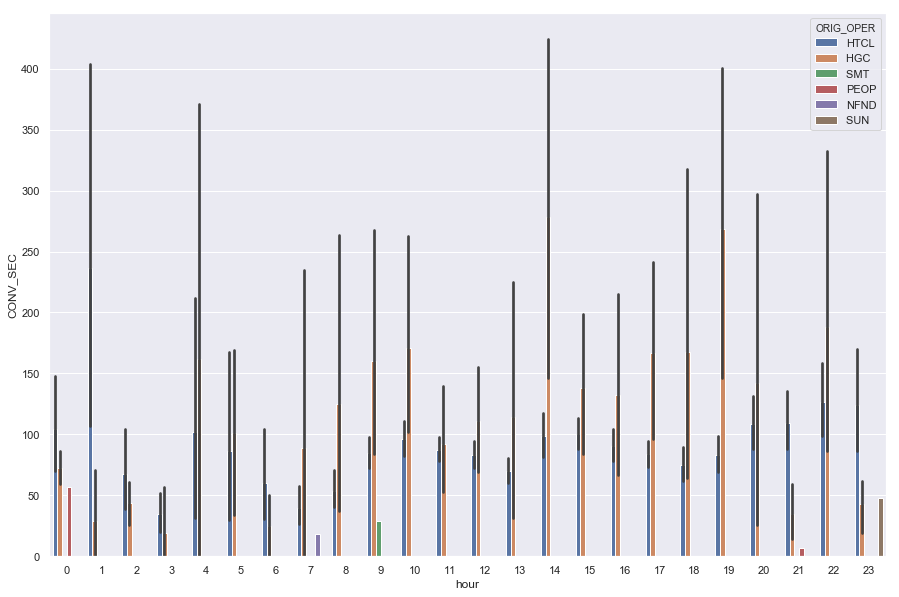

In [21]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,10))
sns.barplot(x="hour", y="CONV_SEC",hue="ORIG_OPER", data=data)
plt.show()

### KMeans clustering

In [28]:
col_names=['hour','CONV_SEC']

In [29]:
data1=data[col_names]

In [30]:
dataz=data1.apply(zscore)
dataz.head()

,hour,CONV_SEC
0,-2.654823,-0.382195
1,1.222433,-0.124440
2,-0.830232,-0.356842
3,0.310138,-0.373744
4,0.310138,0.133314


In [31]:
cluster_range=range(1,15)
cluster_error=[]
for num_cluster in cluster_range:
    model=KMeans(num_cluster)
    model.fit(dataz)
    cluster_error.append(model.inertia_)

In [32]:
labels=model.labels_
centroids=model.cluster_centers_

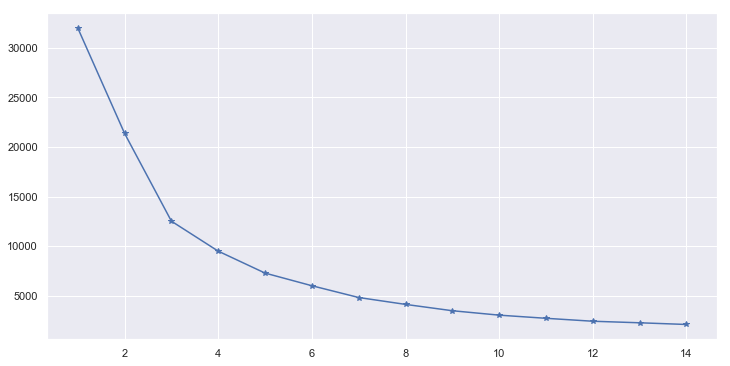

In [33]:
plt.figure(figsize=(12,6))
plt.plot(cluster_range,cluster_error,marker='*')

#### For the cluster 3

In [34]:
kmeans=KMeans(n_clusters=3,n_init=15,random_state=2)

In [35]:
kmeans.fit(dataz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [36]:
centroids=kmeans.cluster_centers_
centroids

array([[-0.82226108, -0.12069589],
       [ 0.80236392, -0.08655447],
       [ 0.14909908,  5.48977716]])

In [37]:
centroids_data=pd.DataFrame(centroids,columns=list(dataz))

In [38]:
centroids_data

,hour,CONV_SEC
0,-0.822261,-0.120696
1,0.802364,-0.086554
2,0.149099,5.489777


In [39]:
kmeans.labels_[:30]

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0])

In [40]:
data1['labels']=kmeans.labels_
data1.head()

,hour,CONV_SEC,labels
0,2,0,0
1,19,61,1
2,10,6,0
3,15,2,1
4,15,122,1


In [41]:
data1.labels.value_counts()

1    7922
0    7784
2     294
Name: labels, dtype: int64

#### For the cluster 2

In [42]:
kmeans=KMeans(n_clusters=2,n_init=15,random_state=2)

In [43]:
kmeans.fit(dataz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2, tol=0.0001, verbose=0)

In [44]:
centroids=kmeans.cluster_centers_
centroids

array([[-0.82562688, -0.05595258],
       [ 0.80022297,  0.05423096]])

In [45]:
centroids_data=pd.DataFrame(centroids,columns=list(dataz))

In [46]:
centroids_data

,hour,CONV_SEC
0,-0.825627,-0.055953
1,0.800223,0.054231


In [47]:
kmeans.labels_[:30]

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0])

In [48]:
data1['labels']=kmeans.labels_
data1.head()

,hour,CONV_SEC,labels
0,2,0,0
1,19,61,1
2,10,6,0
3,15,2,1
4,15,122,1


In [49]:
data1.labels.value_counts()

1    8124
0    7876
Name: labels, dtype: int64